In [9]:
import os 
import matplotlib.pyplot as plt 
import cv2
import numpy as np

In [17]:
DATADIR="D:\\machine learning\\New folder"
CATAGORIES=['not_human','human']

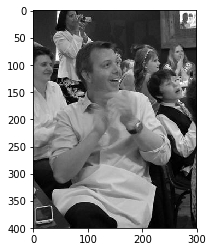

In [18]:
for catagories in CATAGORIES:
    path=os.path.join(DATADIR,catagories)
    
    for img in os.listdir(path):
        image=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(image,cmap="gray")
        plt.show
        break

In [21]:
IMG_SIZE=32

In [22]:
dataset=[]
def create_training_data():
    for catagories in CATAGORIES:
        path=os.path.join(DATADIR,catagories)
        class_num=CATAGORIES.index(catagories)
        for img in os.listdir(path):
            image=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array=cv2.resize(image,(IMG_SIZE,IMG_SIZE))
            dataset.append([new_array,class_num])
            
create_training_data()

In [23]:
len(dataset)

3453

In [24]:
import random
random.shuffle(dataset)

In [25]:

X=[]
Y=[]

for feature ,label in dataset:
    X.append(feature)
    Y.append(label)

In [26]:
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [27]:
X.shape

(3453, 32, 32, 1)

In [28]:

from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

Using TensorFlow backend.


In [29]:
Y=to_categorical(Y)

In [30]:

Y.shape

(3453, 2)

In [31]:

X=X/255

In [32]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D,Flatten,Dense,MaxPool2D,Dropout
from tensorflow.keras.callbacks import TensorBoard
model=Sequential()

In [36]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (32,32,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

In [37]:
model.compile(optimizer = "adam" , loss = "binary_crossentropy", metrics=["accuracy"])

In [38]:
model.fit(X,Y, batch_size = 32, epochs =10)

Epoch 1/10
3453/3453 [==============================] - 48s 14ms/step - loss: 0.5592 - acc: 0.7260
Epoch 2/10
3453/3453 [==============================] - 46s 13ms/step - loss: 0.4256 - acc: 0.8138
Epoch 3/10
3453/3453 [==============================] - 46s 13ms/step - loss: 0.3763 - acc: 0.8410
Epoch 4/10
3453/3453 [==============================] - 46s 13ms/step - loss: 0.3451 - acc: 0.8607
Epoch 5/10
3453/3453 [==============================] - 46s 13ms/step - loss: 0.3273 - acc: 0.8610
Epoch 6/10
3453/3453 [==============================] - 47s 14ms/step - loss: 0.3222 - acc: 0.8656
Epoch 7/10
3453/3453 [==============================] - 47s 13ms/step - loss: 0.3124 - acc: 0.8763
Epoch 8/10
3453/3453 [==============================] - 46s 13ms/step - loss: 0.3116 - acc: 0.8671
Epoch 9/10
3453/3453 [==============================] - 46s 13ms/step - loss: 0.2998 - acc: 0.8734
Epoch 10/10
3453/3453 [==============================] - 46s 13ms/step - loss: 0.2735 - acc: 0.8876


In [39]:
from keras.preprocessing.image import ImageDataGenerator

In [40]:
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False,  
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    zca_whitening=False,  
    rotation_range=45,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    horizontal_flip=True,  
    vertical_flip=True)

In [42]:
datagen.fit(X)

In [43]:
model.fit_generator(datagen.flow(X, Y, batch_size = 32),
                    steps_per_epoch = len(X) / 32, # number of samples per gradient update
                    epochs = 3, # number of iterations
                    validation_data= (X, Y),
                    verbose=1)

Epoch 1/3
108/107 [==============================] - 61s 566ms/step - loss: 0.4622 - acc: 0.7850 - val_loss: 0.7070 - val_acc: 0.7394
Epoch 2/3
108/107 [==============================] - 62s 570ms/step - loss: 0.4385 - acc: 0.8010 - val_loss: 0.5845 - val_acc: 0.7695
Epoch 3/3
108/107 [==============================] - 61s 569ms/step - loss: 0.3930 - acc: 0.8283 - val_loss: 0.7502 - val_acc: 0.7643
